In [11]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
dataset = pd.read_csv("Data_Pengelompokkan_Negara.csv")
X = dataset.iloc[:,[1,7]].values

In [14]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


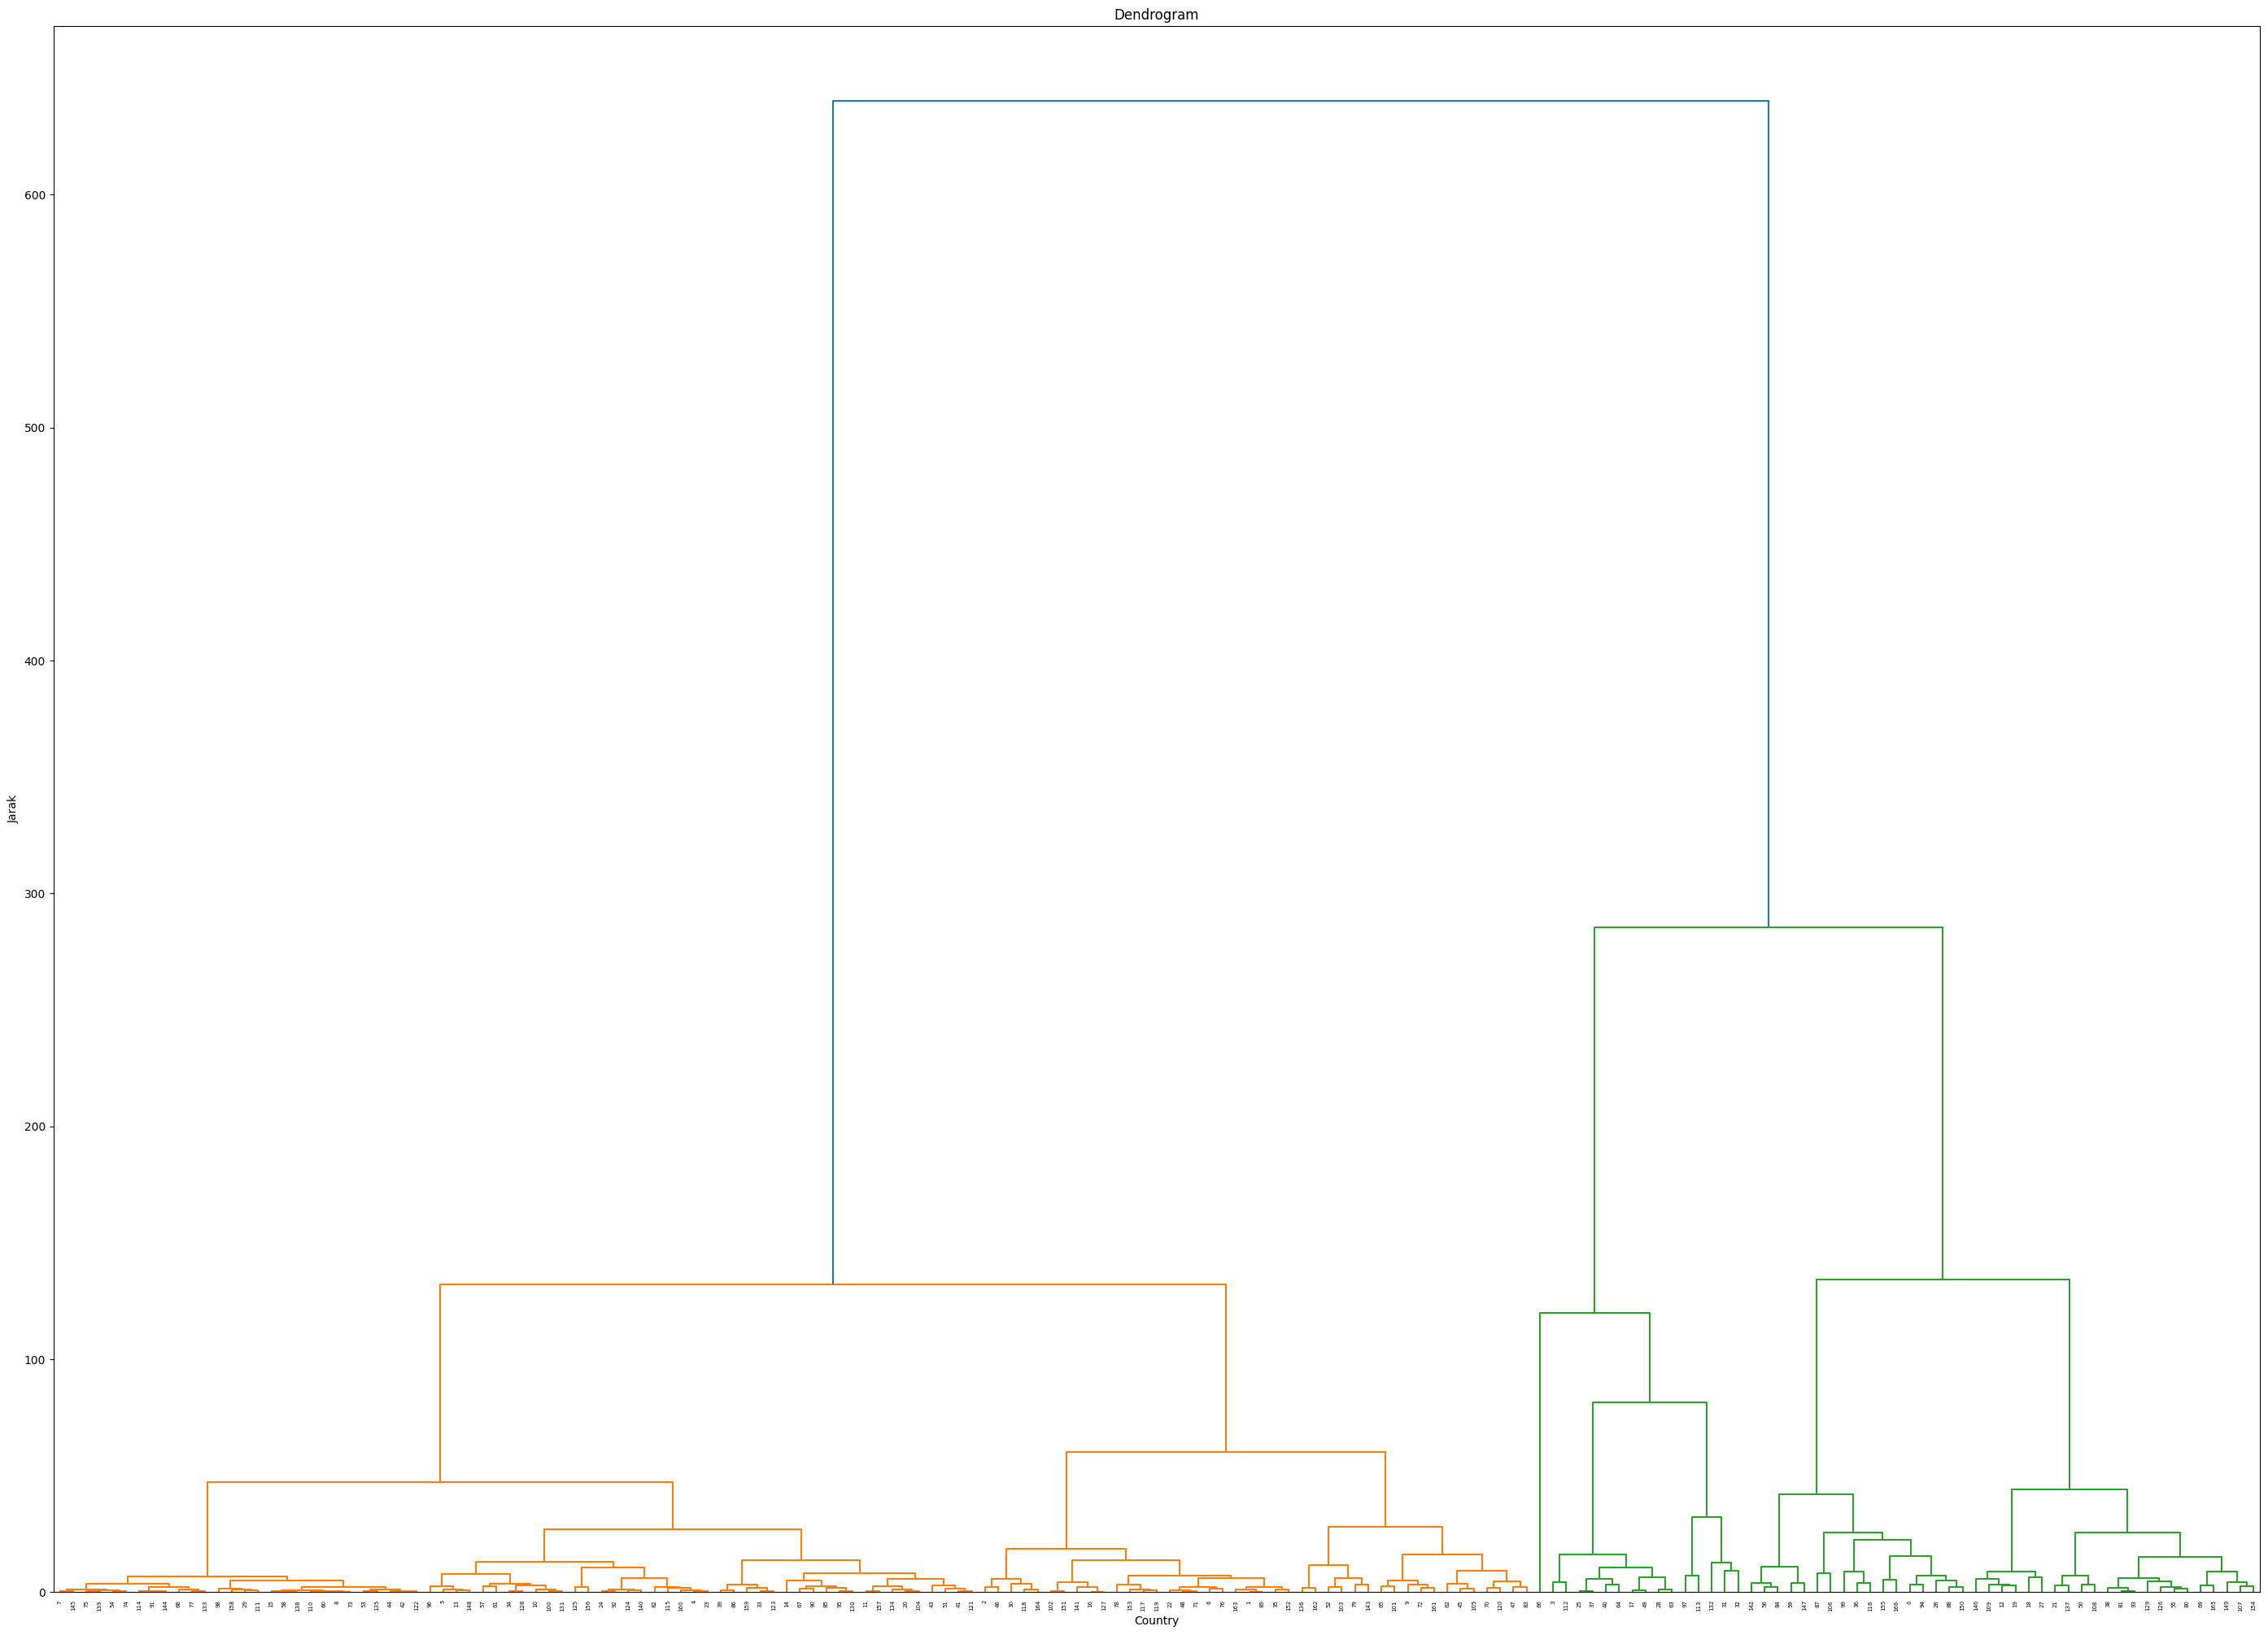

In [27]:
plt.figure(figsize=(35, 25))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Country")
plt.ylabel("Jarak")
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 10, affinity = "euclidean", linkage = "ward" )
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


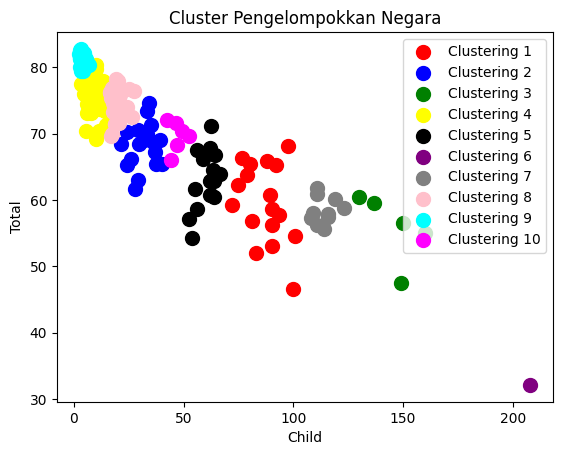

In [34]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1],s = 100, c ="red", label = "Clustering 1")
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1],s = 100, c ="blue", label = "Clustering 2")
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1],s = 100, c ="green", label = "Clustering 3")
plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1],s = 100, c ="yellow", label = "Clustering 4")
plt.scatter(X[y_hc == 4,0], X[y_hc == 4,1],s = 100, c ="black", label = "Clustering 5")
plt.scatter(X[y_hc == 5,0], X[y_hc == 5,1],s = 100, c ="purple", label = "Clustering 6")
plt.scatter(X[y_hc == 6,0], X[y_hc == 6,1],s = 100, c ="gray", label = "Clustering 7")
plt.scatter(X[y_hc == 7,0], X[y_hc == 7,1],s = 100, c ="pink", label = "Clustering 8")
plt.scatter(X[y_hc == 8,0], X[y_hc == 8,1],s = 100, c ="cyan", label = "Clustering 9")
plt.scatter(X[y_hc == 9,0], X[y_hc == 9,1],s = 100, c ="magenta", label = "Clustering 10")

plt.title("Cluster Pengelompokkan Negara")
plt.xlabel("Child")
plt.ylabel("Total")
plt.legend()
plt.show()

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(dataset[["child_mort"]])
dataset["child_mort"] = scaler.transform(dataset[["child_mort"]])
scaler.fit(dataset[["exports"]])
dataset["exports"] = scaler.transform(dataset[["exports"]])
scaler.fit(dataset[["health"]])
dataset["health"] = scaler.transform(dataset[["health"]])
scaler.fit(dataset[["imports"]])
dataset["imports"] = scaler.transform(dataset[["imports"]])
scaler.fit(dataset[["income"]])
dataset["income"] = scaler.transform(dataset[["income"]])
scaler.fit(dataset[["inflation"]])
dataset["inflation"] = scaler.transform(dataset[["inflation"]])
scaler.fit(dataset[["life_expec"]])
dataset["life_expec"] = scaler.transform(dataset[["life_expec"]])
scaler.fit(dataset[["total_fer"]])
dataset["total_fer"] = scaler.transform(dataset[["total_fer"]])
scaler.fit(dataset[["gdpp"]])
dataset["gdpp"] = scaler.transform(dataset[["gdpp"]])
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [46]:
data = dataset.iloc[:,1:2]
from sklearn.metrics import davies_bouldin_score
results = {}
for i in range(2,11):
  ahc = AgglomerativeClustering(n_clusters = 10, affinity = "euclidean", linkage = "ward")
  labels = ahc.fit_predict(data)
  db_index = davies_bouldin_score(data, labels)
  results.update({i: db_index})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [47]:
results

{2: 0.41914505419903325,
 3: 0.41914505419903325,
 4: 0.41914505419903325,
 5: 0.41914505419903325,
 6: 0.41914505419903325,
 7: 0.41914505419903325,
 8: 0.41914505419903325,
 9: 0.41914505419903325,
 10: 0.41914505419903325}

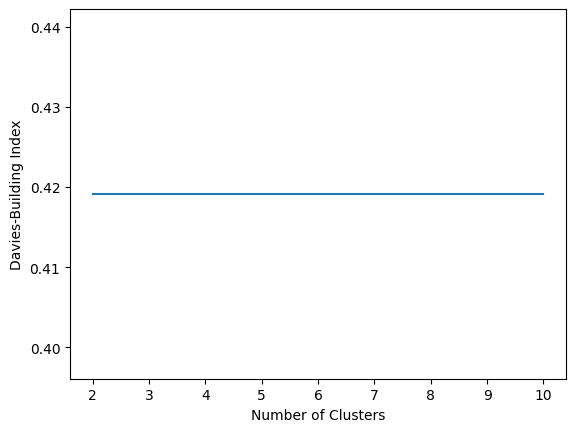

In [50]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Building Index")
plt.show()

In [52]:
ahc = AgglomerativeClustering(n_clusters = 10, affinity = "euclidean", linkage = "ward")
ahc.fit(data)
pred = ahc.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [53]:
pred

array([2, 7, 0, 5, 4, 7, 7, 4, 4, 0, 7, 4, 3, 7, 4, 4, 7, 5, 3, 3, 4, 3,
       7, 4, 4, 5, 2, 3, 5, 4, 0, 1, 1, 4, 7, 7, 2, 5, 9, 4, 5, 4, 4, 4,
       4, 0, 0, 0, 7, 5, 3, 4, 0, 4, 4, 9, 8, 7, 4, 8, 4, 7, 0, 5, 5, 0,
       6, 4, 4, 3, 0, 7, 0, 4, 4, 4, 7, 4, 7, 7, 9, 9, 4, 0, 8, 4, 4, 2,
       2, 7, 4, 4, 4, 9, 2, 4, 7, 1, 4, 2, 7, 0, 7, 0, 4, 0, 2, 9, 3, 3,
       4, 4, 5, 1, 4, 4, 2, 7, 0, 7, 0, 4, 4, 4, 4, 4, 9, 7, 7, 9, 4, 7,
       1, 4, 4, 4, 0, 3, 4, 4, 4, 7, 8, 0, 4, 4, 3, 8, 7, 9, 2, 7, 7, 7,
       9, 8, 4, 4, 4, 4, 4, 0, 0, 7, 0, 3, 8])

In [54]:
db_index = davies_bouldin_score(data, pred)
print(db_index)

0.41914505419903325
